# Table of Content

- [1.0 Splitting](#1.0)

- [2.0 SGDClassifier (sgdc)](#2.0)

  - [2.1 Build sgdc Model](#2.1)
  - [2.2 Evaluate sgdc Model](#2.2)

- [3.0 SVMClassifier (svc))](#3.0)

  - [3.1 Build svc Model](3.1)
  - [3.2 Evaluate svc Model](#3.2)

- [4.0 Decision-Trees (DTsC)](#4.0)

  - [4.1 Build DTsC Model](#4.1)
  - [4.2 Evaluate DTsC Model](#4.2)

- [5.0 RandomForestClassifier (RFC)](#5.0)

  - [5.1 Build RFC Model](#5.1)
  - [5.2 Evaluate RFC Model](#5.2)

- [6.0 VottingSystemClassifier (VSC)](#6.0)


In [1]:
# algebra
import numpy as np

# dataframes
import pandas as pd

# EDA & visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# log
import math

# spliting and optimizing models
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

# linear model
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
)

# Trees
from sklearn.tree import plot_tree, DecisionTreeClassifier


# Ensembles
from sklearn.ensemble import (
    RandomForestClassifier,
    VotingClassifier,
)

# SVMs
from sklearn.svm import SVC

# Feature preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Model scoring
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    confusion_matrix,
    classification_report,
)

# model pipelining
from sklearn.pipeline import Pipeline

# Selection

pd.options.display.max_columns = None

/tmp/ipykernel_18839/2367399485.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
heart_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/Heart-Disease-Prediction/Prepered data sets/final_dataset.csv"
)

heart_df = heart_df.drop(columns=["Unnamed: 0"], axis=1)
heart_df

,Age,Resting_blood_pressure,cholesterol,Maximum_heart_rate,old_peak,Number_major_vessels,Heart_disease,range_Age,range_Resting_blood_pressure,range_cholesterol,range_Maximum_heart_rate,Sex_Male,Chest_pain_Atypical angina,Chest_pain_Non-anginal pain,Chest_pain_Typical angina,Fasting_blood_sugar_True,electrocardiographic_Hypertrophy,electrocardiographic_Normal,Exercise_induced_angina_Yes,Slope_of_peak_exercise_Flat,Slope_of_peak_exercise_Upsloping,stress_test_Normal,stress_test_Not described,stress_test_Reversible defect
0,63,145,233,150,2.3,0,1,3,3,4,4,1,0,0,0,1,0,1,0,0,1,0,0,0
1,37,130,250,187,3.5,0,1,1,2,4,4,1,0,1,0,0,0,0,0,0,1,0,0,1
2,41,130,204,172,1.4,0,1,1,2,4,4,0,1,0,0,0,0,1,0,0,0,0,0,1
3,56,120,236,178,0.8,0,1,3,1,4,4,1,1,0,0,0,0,0,0,0,0,0,0,1
4,57,120,354,163,0.6,0,1,3,1,4,4,0,0,0,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,57,140,241,123,0.2,0,0,3,3,4,4,0,0,0,1,0,0,0,1,1,0,0,1,0
259,45,110,264,132,1.2,0,0,2,0,4,4,1,0,0,0,0,0,0,0,1,0,0,1,0
260,68,144,193,141,3.4,2,0,4,3,4,4,1,0,0,1,1,0,0,0,1,0,0,1,0
261,57,130,131,115,1.2,1,0,3,2,4,4,1,0,0,1,0,0,0,1,1,0,0,1,0


# [1.0 Splitting](#1.0)


In [3]:
features = heart_df.drop(columns=["Heart_disease"], axis=1)
test = heart_df["Heart_disease"]
x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.35, random_state=42
)
x_train.shape, x_test.shape

((170, 23), (93, 23))

# [2.0 SGDClassifier (sgdc)](#2.0)


### [2.1 Build sgdc Model](#2.1)


In [86]:
def build_SGD(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):
    train_score, test_score, used_alphas = [], [], []

    alpha = [
        0.000001,
        0.000002,
        0.00003,
        0.000003,
        0.00004,
        0.000004,
        0.00005,
        0.000005,
        0.00006,
        0.00007,
        0.00008,
        0.00009,
        0.0001,
    ]
    alpha.sort()
    for alp in alpha:

        scaler = StandardScaler()
        SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=alp, random_state=42)

        pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

        pip.fit(x_train, y_train)

        train_acc = pip.score(x_train, y_train)
        test_acc = pip.score(x_test, y_test)
        train_score.append(train_acc)
        test_score.append(test_acc)
        used_alphas.append(alp)

    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SGD()

### [2.2 Evaluate sgdc Model](#2.2)


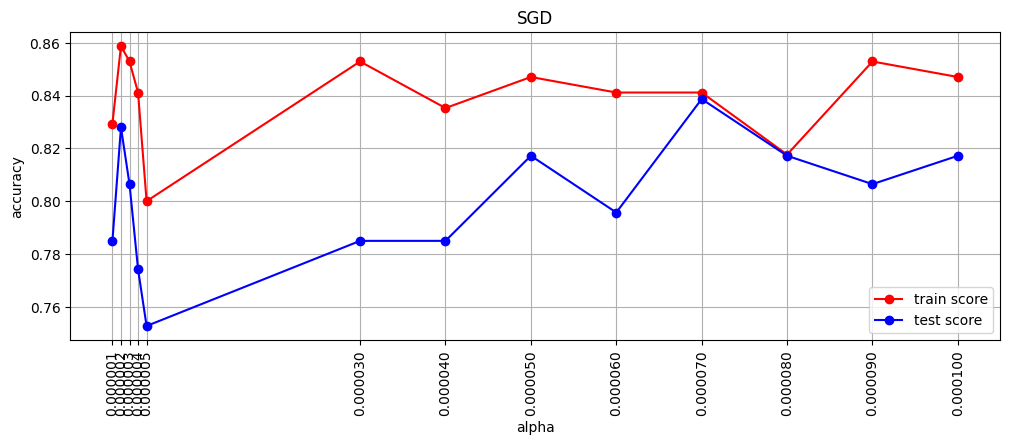

In [87]:
def evaluate_SGD(
    train_score=train_score, test_score=test_score, used_alphas=used_alphas
):
    plt.figure(figsize=(12, 4))

    plt.plot(used_alphas, train_score, color="red", marker="o", label="train score")
    plt.plot(used_alphas, test_score, color="blue", marker="o", label="test score")

    plt.xlabel("alpha")
    plt.ylabel("accuracy")
    plt.title("SGD")
    plt.grid(True)
    plt.xticks(used_alphas, rotation=90)
    plt.legend()
    plt.show()
    return


evaluate_SGD()

In [88]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.00007, random_state=42)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8411764705882353, 0.8387096774193549)

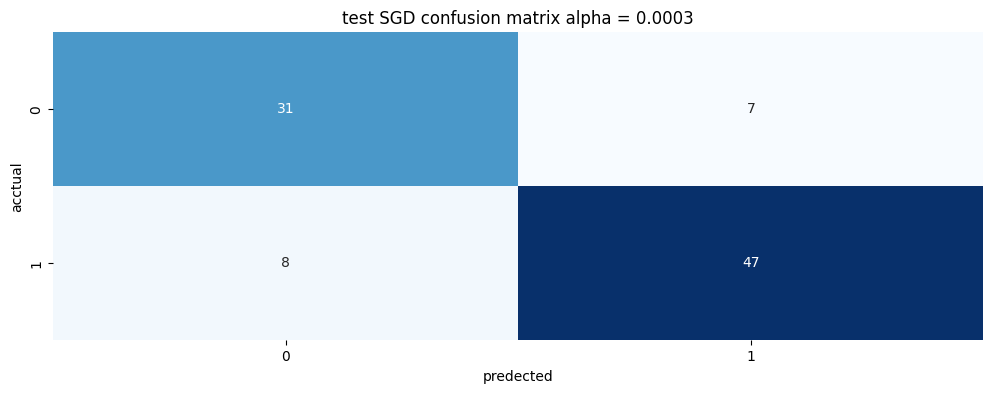

In [90]:
y_pred = pip.predict(x_test)

cm_SGD = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("test SGD confusion matrix alpha = 0.0003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

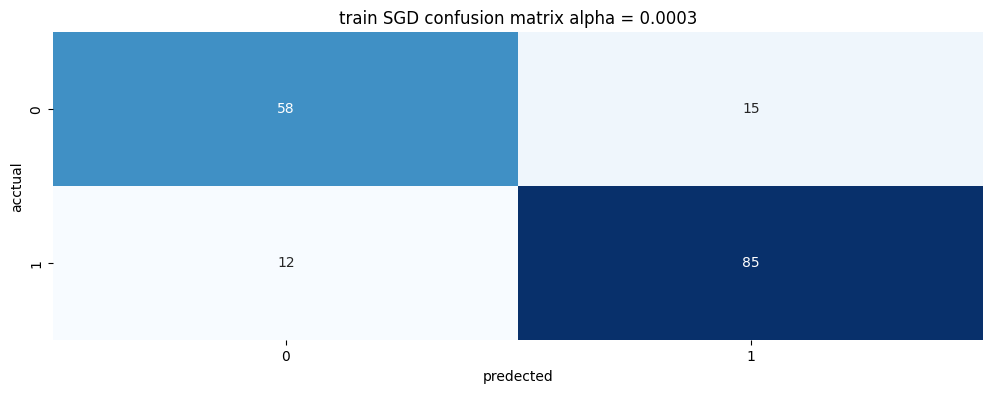

In [91]:
y_pred = pip.predict(x_train)

cm_SGD = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SGD, annot=True, cmap="Blues", cbar=False)
plt.title("train SGD confusion matrix alpha = 0.0003")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [92]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        73
           1       0.85      0.88      0.86        97

    accuracy                           0.84       170
   macro avg       0.84      0.84      0.84       170
weighted avg       0.84      0.84      0.84       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        38
           1       0.87      0.85      0.86        55

    accuracy                           0.84        93
   macro avg       0.83      0.84      0.83        93
weighted avg       0.84      0.84      0.84        93



# [3.0 SVMClassifier (svc))](#3.0)


### [3.1 Build svc Model](3.1)


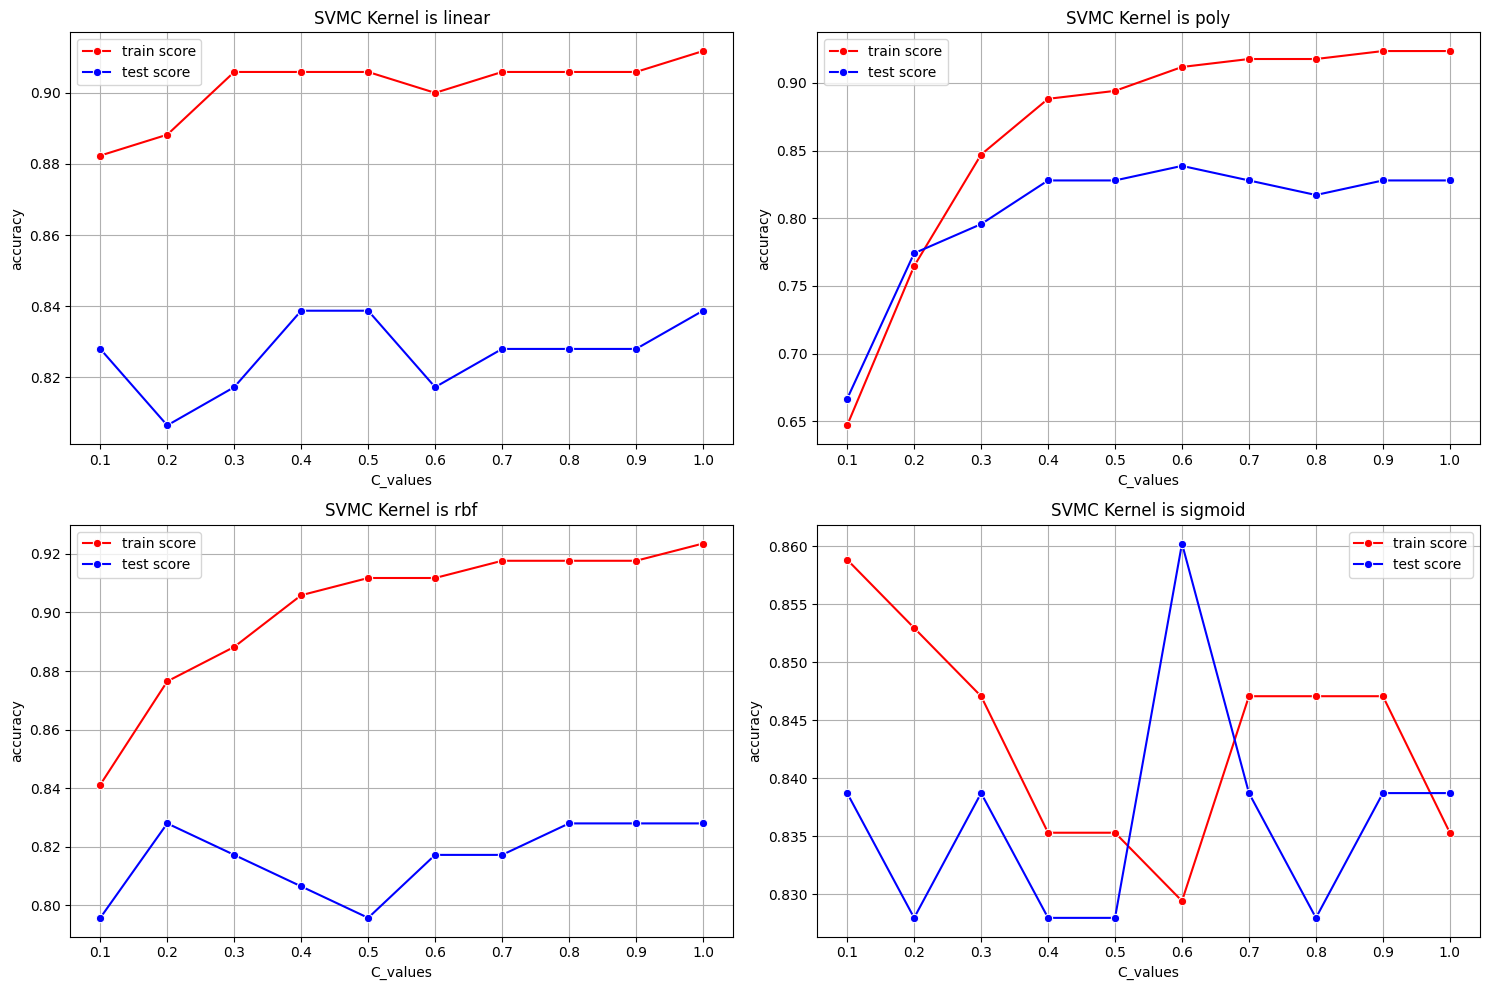

In [93]:
def build_SVM(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test):

    C_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    kernels = ["linear", "poly", "rbf", "sigmoid"]

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    for i, ker in enumerate(kernels):
        train_score, test_score = [], []
        for c in C_values:

            deg = 1
            if ker == "poly":
                deg = 3
            scaler = StandardScaler()
            svc = SVC(kernel=ker, C=c, degree=deg, random_state=42)

            pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

            pip.fit(x_train, y_train)

            train_acc = pip.score(x_train, y_train)
            test_acc = pip.score(x_test, y_test)
            train_score.append(train_acc)
            test_score.append(test_acc)

        row = i // 2
        col = i % 2

        ax = axes[row, col]

        sns.lineplot(
            x=C_values,
            y=train_score,
            color="red",
            marker="o",
            label="train score",
            ax=ax,
        )
        sns.lineplot(
            x=C_values,
            y=test_score,
            color="blue",
            marker="o",
            label="test score",
            ax=ax,
        )

        ax.set_xlabel("C_values")
        ax.set_ylabel("accuracy")
        ax.set_title("SVMC Kernel is " + ker)
        ax.set_xticks(C_values)
        ax.grid(True)

    plt.tight_layout()
    plt.legend()
    plt.show()
    return train_score, test_score, used_alphas


train_score, test_score, used_alphas = build_SVM()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b> best kernel is sigmoid</b><br>
    </span>    
</div>


In [94]:
scaler = StandardScaler()
svc = SVC(kernel="sigmoid", C=0.6, degree=1)

pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])

pip.fit(x_train, y_train)

train_acc = pip.score(x_train, y_train)
test_acc = pip.score(x_test, y_test)
train_acc, test_acc

(0.8294117647058824, 0.8602150537634409)

### [3.2 Evaluate svc Model](#3.2)


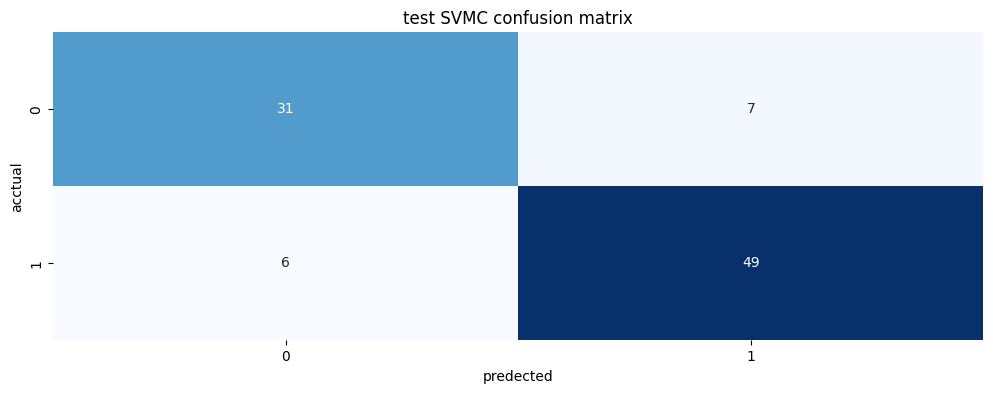

In [95]:
y_pred = pip.predict(x_test)

cm_SVMC = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SVMC, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

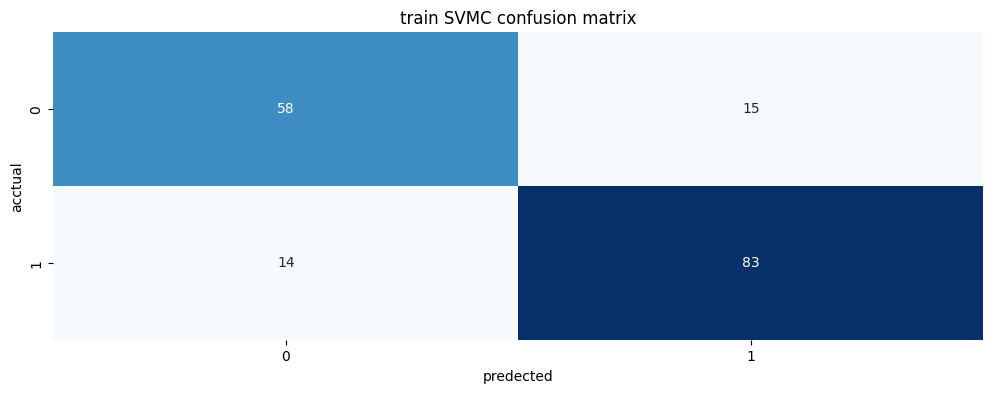

In [96]:
y_pred = pip.predict(x_train)

cm_SVMC = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_SVMC, annot=True, cmap="Blues", cbar=False)
plt.title("train SVMC confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [97]:
y_pred_train = pip.predict(x_train)
y_pred__test = pip.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        73
           1       0.85      0.86      0.85        97

    accuracy                           0.83       170
   macro avg       0.83      0.83      0.83       170
weighted avg       0.83      0.83      0.83       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        38
           1       0.88      0.89      0.88        55

    accuracy                           0.86        93
   macro avg       0.86      0.85      0.85        93
weighted avg       0.86      0.86      0.86        93



# [4.0 Decision-Trees (DTsC)](#4.0)


### [4.1 Build DTsC Model](#4.1)


In [100]:
DTC = DecisionTreeClassifier(random_state=42)
DTC.fit(x_train, y_train)
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7419354838709677)

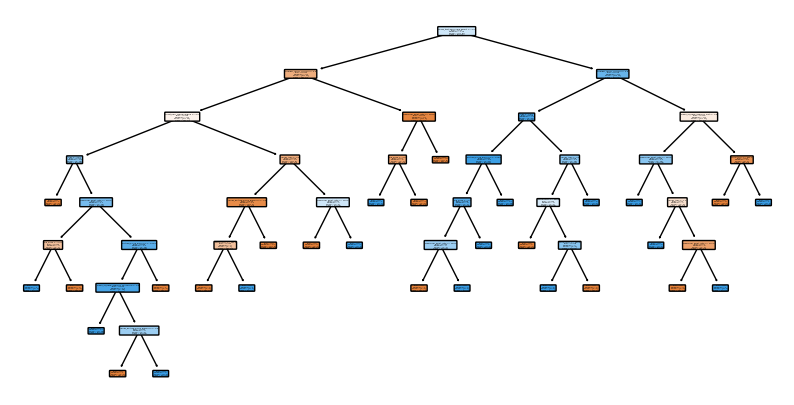

In [101]:
plt.figure(figsize=(10, 5))
plot_tree(
    DTC,
    class_names=["Yes HD", "No HD"],
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

In [102]:
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7419354838709677)

In [103]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models.append(DTC)

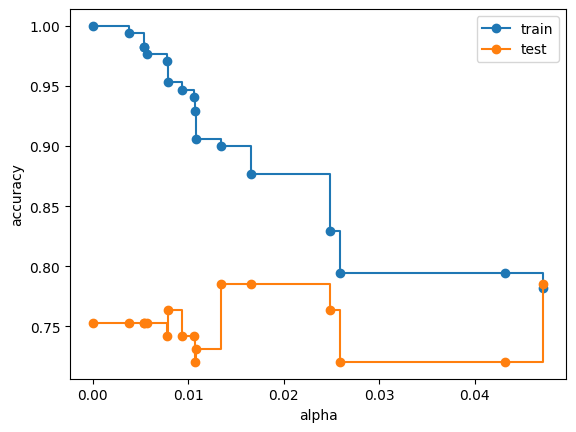

In [104]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

<Axes: xlabel='tree'>

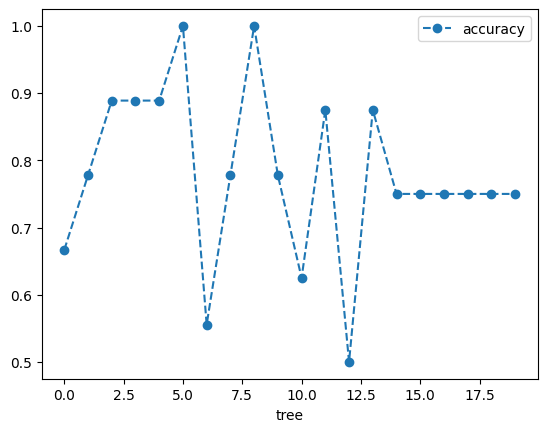

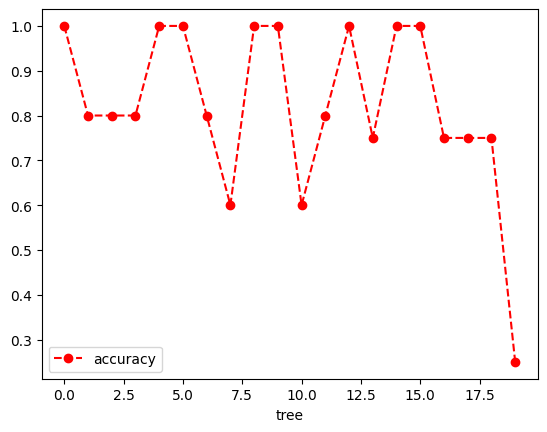

In [112]:
DTC = DecisionTreeClassifier(ccp_alpha=0.013, random_state=42)
score = cross_val_score(DTC, x_train, y_train, cv=20)
score2 = cross_val_score(DTC, x_test, y_test, cv=20)

df_ = pd.DataFrame(data={"tree": range(20), "accuracy": score})
df_2 = pd.DataFrame(data={"tree": range(20), "accuracy": score2})

df_.plot(x="tree", y="accuracy", linestyle="--", marker="o")
df_2.plot(x="tree", y="accuracy", linestyle="--", marker="o", color="red")

<Axes: xlabel='alpha'>

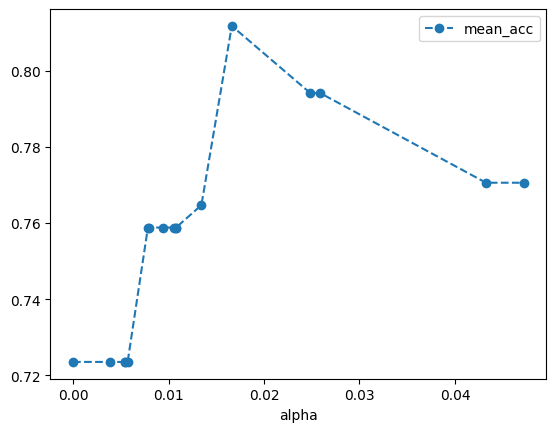

In [111]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models = []

for alpha in alphas:
    DTC = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    score = cross_val_score(DTC, x_train, y_train, cv=5)
    models.append([alpha, np.mean(score), np.std(score)])

alpha_results = pd.DataFrame(models, columns=["alpha", "mean_acc", "std"])

alpha_results.plot(x="alpha", y="mean_acc", linestyle="--", marker="o")

In [106]:
alpha = alpha_results[
    (alpha_results["alpha"] > 0.01) & (alpha_results["alpha"] < 0.02)
]["alpha"]
alpha

8     0.010588
9     0.010756
10    0.010794
11    0.013445
12    0.016629
Name: alpha, dtype: float64

In [110]:
DTC_pruned = DecisionTreeClassifier(ccp_alpha=0.016629, random_state=42)
DTC_pruned.fit(x_train, y_train)
DTC_pruned.score(x_train, y_train), DTC_pruned.score(x_test, y_test)

(0.8764705882352941, 0.7849462365591398)

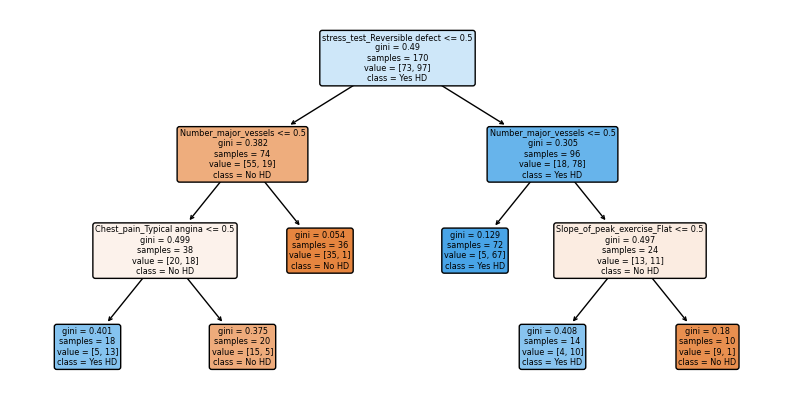

In [113]:
plt.figure(figsize=(10, 5))
plot_tree(
    DTC_pruned,
    class_names=["No HD", "Yes HD"],
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

### [4.2 Evaluate DTsC Model](#4.2)


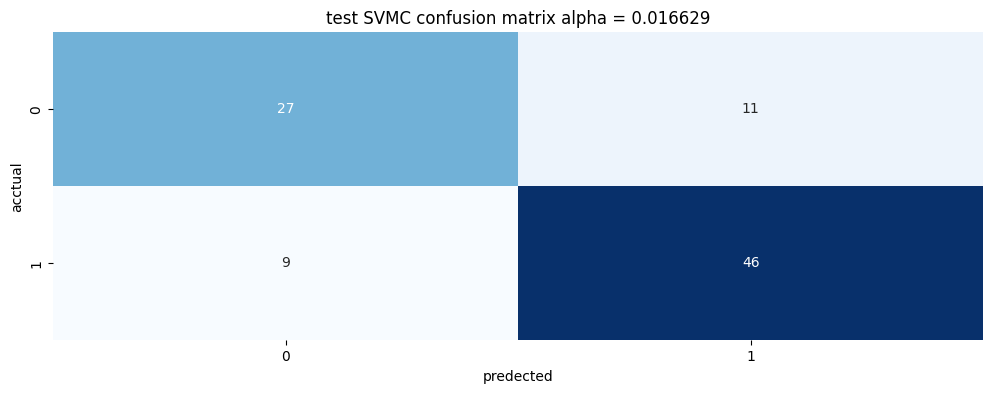

In [114]:
y_pred = DTC_pruned.predict(x_test)

cm_DTC_pruned = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC_pruned, annot=True, cmap="Blues", cbar=False)
plt.title("test SVMC confusion matrix alpha = 0.016629")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

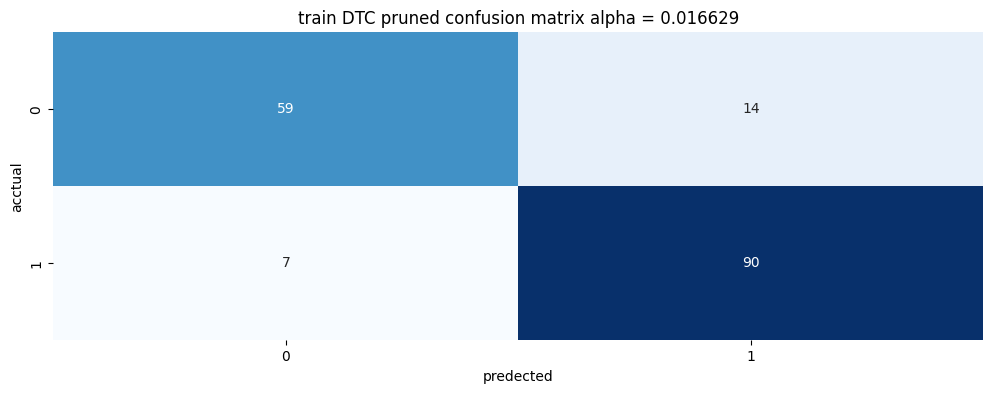

In [115]:
y_pred = DTC_pruned.predict(x_train)

cm_DTC_pruned = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_DTC_pruned, annot=True, cmap="Blues", cbar=False)
plt.title("train DTC pruned confusion matrix alpha = 0.016629")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [116]:
y_pred_train = DTC_pruned.predict(x_train)
y_pred__test = DTC_pruned.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        73
           1       0.87      0.93      0.90        97

    accuracy                           0.88       170
   macro avg       0.88      0.87      0.87       170
weighted avg       0.88      0.88      0.88       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        38
           1       0.81      0.84      0.82        55

    accuracy                           0.78        93
   macro avg       0.78      0.77      0.78        93
weighted avg       0.78      0.78      0.78        93



# [5.0 RandomForestClassifier (RFC)](#5.0)

- [5.2 Evaluate RFC Model](#5.2)


### - [5.1 Build RFC Model](#5.1)


In [117]:
RF = RandomForestClassifier(n_estimators=50, random_state=45)
RF.fit(x_train, y_train)
RF.score(x_train, y_train), RF.score(x_test, y_test)

(1.0, 0.8172043010752689)

In [118]:
param_grid = {
    "max_depth": [25, 30, 31],
    "min_samples_split": [2, 4, 5, 6, 10],
    "min_samples_leaf": [1, 2, 3, 6],
    "ccp_alpha": [0.00001, 0.0000001, 0.00013],
}

RF = RandomForestClassifier(n_estimators=50, random_state=45)


optimized_ridge = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.882 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.882 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.765 total time=   0.0s
[CV 4/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 5/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=2;, score=0.824 total time=   0.0s
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.853 total time=   0.0s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.912 total time=   0.0s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, min_samples_leaf=1, min_samples_split=4;, score=0.735 total time=   0.0s
[

In [119]:
RF = RandomForestClassifier(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=10,
)
RF.fit(x_train, y_train)

RandomForestClassifier(ccp_alpha=1e-05, max_depth=25, min_samples_split=10,
                       n_estimators=50, random_state=45)

In [120]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9411764705882353, 0.8279569892473119)

### [3.2 Evaluate svc Model](#3.2)


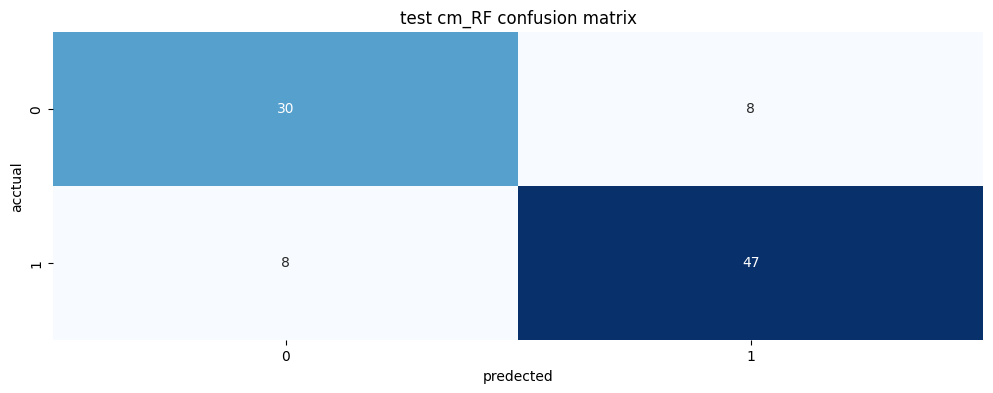

In [121]:
y_pred = RF.predict(x_test)

cm_RF = confusion_matrix(y_true=y_test, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False)
plt.title("test cm_RF confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

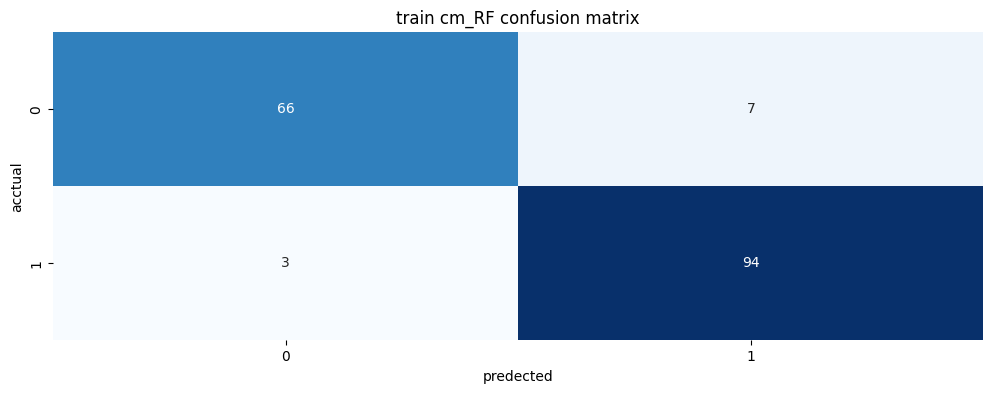

In [122]:
y_pred = RF.predict(x_train)

cm_RF = confusion_matrix(y_true=y_train, y_pred=y_pred)

plt.figure(figsize=(12, 4))
sns.heatmap(cm_RF, annot=True, cmap="Blues", cbar=False)
plt.title("train cm_RF confusion matrix")
plt.ylabel("acctual")
plt.xlabel("predected")
plt.show()

In [34]:
y_pred_train = RF.predict(x_train)
y_pred__test = RF.predict(x_test)

print("Classification Report - Train Data:")
print(classification_report(y_true=y_train, y_pred=y_pred_train))

print("Classification Report - Test Data:")
print(classification_report(y_true=y_test, y_pred=y_pred__test))

Classification Report - Train Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        73
           1       0.99      1.00      0.99        97

    accuracy                           0.99       170
   macro avg       0.99      0.99      0.99       170
weighted avg       0.99      0.99      0.99       170

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        38
           1       0.85      0.84      0.84        55

    accuracy                           0.82        93
   macro avg       0.81      0.81      0.81        93
weighted avg       0.82      0.82      0.82        93



# [6.0 VottingSystemClassifier (VSC)](#6.0)


In [124]:
scaler = StandardScaler()
SGD = SGDClassifier(loss="log_loss", penalty="l2", alpha=0.0003)

SGD_pip = Pipeline(steps=[("StandardScaler", scaler), ("SGDClassifier", SGD)])


scaler = StandardScaler()
svc = SVC(kernel="sigmoid", C=0.5, degree=1)

svc_pip = Pipeline(steps=[("StandardScaler", scaler), ("SVMClassifire", svc)])


DTC_pruned = DecisionTreeClassifier(ccp_alpha=0.016629, random_state=42)

RF = RandomForestClassifier(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=25,
    min_samples_leaf=1,
    min_samples_split=10,
)


vot = VotingClassifier(
    estimators=[
        ("SGD_pip", SGD_pip),
        ("svc_pip", svc_pip),
        ("DTC_pruned", DTC_pruned),
        ("RF", RF),
    ]
)
vot.fit(x_train, y_train)
vot.score(x_train, y_train), vot.score(x_test, y_test)

(0.9, 0.8279569892473119)